In [107]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,roc_auc_score

In [108]:
df_train = pd.read_csv(r"C:\Users\273309\OneDrive\Desktop\BIA\Churn_Modelling.csv")
df_train.shape

(10000, 14)

In [109]:
df_train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [110]:
df_train.drop(['RowNumber'],axis =1,inplace = True)

In [111]:
df_train.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<Axes: xlabel='Exited', ylabel='count'>

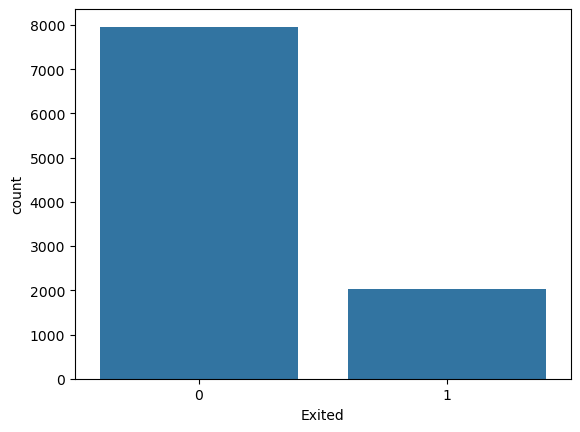

In [112]:
sns.countplot(x = "Exited" , data = df_train)

In [113]:
df_train.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [114]:
df_train['Surname'].value_counts()

Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64

In [115]:
df_train.drop(['Surname'],axis = 1,inplace = True)

In [116]:
cat_variables = df_train.select_dtypes(exclude = np.number).columns
print(cat_variables)

Index(['Geography', 'Gender'], dtype='object')


In [117]:
le = LabelEncoder()

df_train['Geography'] = le.fit_transform(df_train['Geography'])
df_train['Gender'] = le.fit_transform(df_train['Gender'])

In [118]:
df_train.drop(['CustomerId'],axis = 1,inplace = True)

In [119]:
df_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [120]:
X = df_train.drop(['Exited'] , axis = 1)
y = df_train[['Exited']]

In [121]:
lr = LogisticRegression(class_weight="balanced")

In [122]:
import warnings
warnings.filterwarnings("ignore")

In [123]:
from sklearn.model_selection import StratifiedKFold
kFold = StratifiedKFold(n_splits=4)

In [124]:
from sklearn.model_selection import cross_validate

cross_validate(lr,X,y,cv = 4,scoring="accuracy")

{'fit_time': array([0.11086392, 0.13286781, 0.11167717, 0.12863302]),
 'score_time': array([0.00402093, 0.00300097, 0.00352573, 0.0029695 ]),
 'test_score': array([0.656 , 0.6672, 0.684 , 0.6664])}

In [125]:
from sklearn.model_selection import cross_validate

cross_validate(lr,X,y,cv = 4,scoring="accuracy",return_train_score=True,
    return_estimator=False,)

{'fit_time': array([0.11751747, 0.09572721, 0.10154343, 0.11470747]),
 'score_time': array([0.00351834, 0.00400543, 0.00480843, 0.00473404]),
 'test_score': array([0.656 , 0.6672, 0.684 , 0.6664]),
 'train_score': array([0.6592    , 0.69346667, 0.66973333, 0.66293333])}

In [126]:
from sklearn.model_selection import cross_validate

cross_validate(lr,X,y,cv = kFold,scoring="recall",return_train_score=True,
    return_estimator=False,)

{'fit_time': array([0.12496591, 0.10727167, 0.10824656, 0.12033248]),
 'score_time': array([0.00802994, 0.00755286, 0.00844169, 0.00702262]),
 'test_score': array([0.65882353, 0.61100196, 0.67583497, 0.66011788]),
 'train_score': array([0.67387033, 0.62303665, 0.65837696, 0.66295812])}

In [127]:
from sklearn.model_selection import cross_validate

cross_validate(lr,X,y,cv = 4,scoring="recall",return_train_score=True,
    return_estimator=False,)

{'fit_time': array([0.09896183, 0.08755684, 0.15263462, 0.11627769]),
 'score_time': array([0.00811625, 0.00803566, 0.00803304, 0.00860786]),
 'test_score': array([0.65882353, 0.61100196, 0.67583497, 0.66011788]),
 'train_score': array([0.67387033, 0.62303665, 0.65837696, 0.66295812])}

In [128]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier # dt as decisiontreeclassifier function

In [129]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    random_state=42
)


In [130]:
from sklearn.model_selection import KFold

kFold = KFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)


In [131]:
print(type(dt))
print(type(kFold))


<class 'sklearn.tree._classes.DecisionTreeClassifier'>
<class 'sklearn.model_selection._split.KFold'>


In [132]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(
    dt,
    X,
    y,
    cv=kFold,
    scoring="recall",
    return_train_score=True,
    return_estimator=False
)

In [133]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy',
                            max_depth=6,
                            min_samples_split=3,
                            min_samples_leaf=3,
                            min_weight_fraction_leaf=0.0,
                            max_features=None,
                            random_state=42,
                            max_leaf_nodes=2,
                            class_weight="balanced",)

In [134]:
cross_validate(dt,X,y,cv = kFold,scoring="recall",return_train_score=True,
    return_estimator=False,)

{'fit_time': array([0.0276711 , 0.02005863, 0.01430297, 0.01404572, 0.01330733]),
 'score_time': array([0.00938416, 0.00803828, 0.007725  , 0.00703812, 0.00853467]),
 'test_score': array([0.65903308, 0.61390887, 0.61904762, 0.64735516, 0.55121951]),
 'train_score': array([0.62226277, 0.63333333, 0.63203463, 0.625     , 0.60172096])}

In [135]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy',
                            max_depth=6,
                            min_samples_split=3,
                            min_samples_leaf=3,
                            min_weight_fraction_leaf=0.0,
                            max_features=None,
                            random_state=42,
                            max_leaf_nodes=2,
                            class_weight="balanced",)

In [136]:
cross_validate(dt,X,y,cv = kFold,scoring="recall",return_train_score=True,
    return_estimator=False,)

{'fit_time': array([0.01603484, 0.01463675, 0.01918626, 0.01545548, 0.01542711]),
 'score_time': array([0.0095284 , 0.01208377, 0.00805807, 0.02140522, 0.00707269]),
 'test_score': array([0.65903308, 0.61390887, 0.61904762, 0.64735516, 0.55121951]),
 'train_score': array([0.62226277, 0.63333333, 0.63203463, 0.625     , 0.60172096])}

In [137]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200,
                             criterion='gini',
                             max_depth=6,
                             min_samples_split=2,
                             min_samples_leaf=1,
                             class_weight="balanced")
                             

In [138]:
cross_validate(dt,X,y,cv = kFold,scoring="recall",return_train_score=True,
    return_estimator=False,)

{'fit_time': array([0.02307391, 0.01392674, 0.02169871, 0.01353931, 0.01423955]),
 'score_time': array([0.01080203, 0.00819612, 0.00837731, 0.00400305, 0.00649762]),
 'test_score': array([0.65903308, 0.61390887, 0.61904762, 0.64735516, 0.55121951]),
 'train_score': array([0.62226277, 0.63333333, 0.63203463, 0.625     , 0.60172096])}

In [139]:
cross_validate(rfc,X,y,cv = kFold,scoring="recall",return_train_score=True,
    return_estimator=False,)

{'fit_time': array([1.92220712, 1.98862195, 1.81185102, 2.24579668, 2.27388692]),
 'score_time': array([0.05596328, 0.10658264, 0.13221049, 0.13769317, 0.09043241]),
 'test_score': array([0.73791349, 0.67386091, 0.70238095, 0.75314861, 0.69512195]),
 'train_score': array([0.743309  , 0.75185185, 0.73469388, 0.74390244, 0.74492932])}

In [140]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier(estimator=rfc,
                         n_estimators=50,
                         learning_rate=0.8,)

In [141]:
cross_validate(adb,X,y,cv = kFold,scoring="recall",return_train_score=True,
    return_estimator=False,)

{'fit_time': array([124.85138655, 121.93450522, 101.62349916, 124.41362906,
        119.46814084]),
 'score_time': array([3.18907952, 2.53890944, 2.24136186, 3.55292916, 3.94026494]),
 'test_score': array([0.61323155, 0.57553957, 0.5952381 , 0.6372796 , 0.55853659]),
 'train_score': array([0.99695864, 0.99753086, 0.99752628, 0.99390244, 0.99692686])}